In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
 


from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

In [2]:
import calendar
from datetime import datetime

from scipy import stats
from scipy.stats import norm

In [3]:
test = pd.read_csv('../input/test.csv')

In [4]:
trX = pd.read_csv('../input/train.csv')
testX = pd.read_csv('../input/test.csv')

In [5]:
trX.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [6]:
testX.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013


In [7]:
combine = [trX,testX]
x = trX

In [8]:
for dataset in combine:
    y= pd.DataFrame(dataset.datetime.str.split(' ',1).tolist(),columns=['date','time'])
    
    dataset['date'] = y['date']
    dataset['time'] = y['time']

In [9]:
combine = [trX,testX]

In [10]:
for dataset in combine:
    dataset = dataset.drop(['datetime'],1)

In [11]:
trX = trX.drop(['datetime'],1)
testX = testX.drop(['datetime'],1)

In [12]:
trX.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00


In [13]:
testX.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,time
0,1,0,1,1,10.66,11.365,56,26.0027,2011-01-20,00:00:00
1,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,01:00:00


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


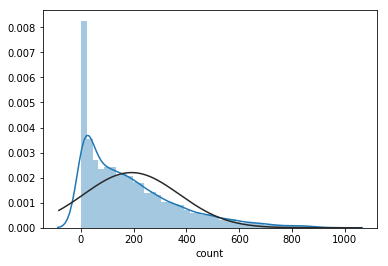

In [14]:
sns.distplot(trX['count'],fit = norm)

In [15]:
trX.skew()

season       -0.007076
holiday       5.660517
workingday   -0.776163
weather       1.243484
temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
dtype: float64

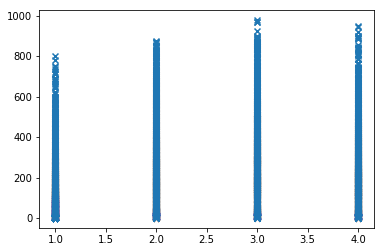

In [16]:
plt.scatter(trX['season'],trX['count'],marker = 'x')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 <a list of 24 Text xticklabel objects>)

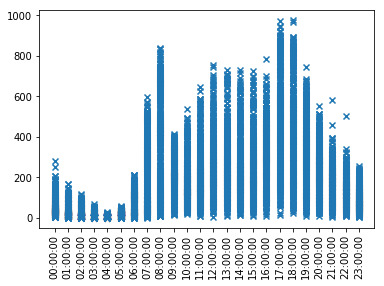

In [17]:
plt.scatter(trX['time'],trX['count'],marker = 'x')
plt.xticks(rotation = 90)

In [18]:
# plt.scatter(trX['date'],trX['count'],marker = 'x')

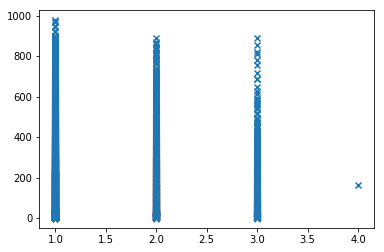

In [19]:
plt.scatter(trX['weather'],trX['count'],marker = 'x')

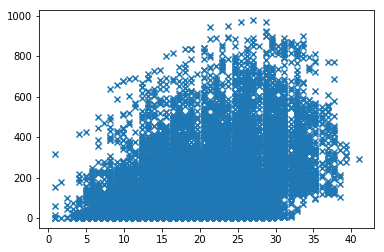

In [20]:
plt.scatter(trX['temp'],trX['count'],marker = 'x')

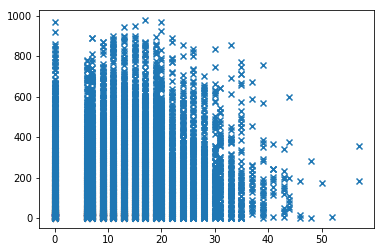

In [21]:
plt.scatter(trX['windspeed'],trX['count'],marker = 'x')

In [22]:
trX = trX.drop(['atemp'],1)
testX = testX.drop(['atemp'],1)

In [23]:
trX['day'] = trX.date.apply(lambda ds: calendar.day_name[datetime.strptime(ds,"%Y-%m-%d").weekday()])

In [24]:
trX['month'] = trX.date.apply(lambda ds: calendar.month_name[datetime.strptime(ds,"%Y-%m-%d").month])

In [25]:
testX['day'] = testX.date.apply(lambda ds:calendar.day_name[datetime.strptime(ds,"%Y-%m-%d").weekday()])

In [26]:
testX['month'] = testX.date.apply(lambda ds: calendar.month_name[datetime.strptime(ds,"%Y-%m-%d").month])

In [27]:
trX.head(2)

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,month
0,1,0,0,1,9.84,81,0.0,3,13,16,2011-01-01,00:00:00,Saturday,January
1,1,0,0,1,9.02,80,0.0,8,32,40,2011-01-01,01:00:00,Saturday,January


In [28]:
testX.head(2)

,season,holiday,workingday,weather,temp,humidity,windspeed,date,time,day,month
0,1,0,1,1,10.66,56,26.0027,2011-01-20,00:00:00,Thursday,January
1,1,0,1,1,10.66,56,0.0000,2011-01-20,01:00:00,Thursday,January


In [29]:
trX['hour'] = [i.hour for i in pd.DatetimeIndex(trX['time'])]

In [30]:
testX['hour'] = [j.hour for j in pd.DatetimeIndex(testX['time'])]

In [31]:
season = pd.get_dummies(trX['season'],prefix = 'season')
weather = pd.get_dummies(trX['weather'],prefix = 'weather')

In [32]:
trX = pd.concat([season,trX],axis=1)
trX = pd.concat([weather,trX],1)

In [33]:
season = pd.get_dummies(testX['season'],prefix = 'season')
weather = pd.get_dummies(testX['weather'],prefix = 'weather')

In [34]:
testX = pd.concat([weather,season,testX],1)

In [35]:
trX = trX.drop(['weather','season'],1)
testX = testX.drop(['weather','season'],1)

In [36]:
trX['year'] = [i.year for i in pd.DatetimeIndex(trX['date'])]
testX['year'] = [i.year for i in pd.DatetimeIndex(testX['date'])]

In [37]:
testX = testX.drop(['date','time'],1)
trX = trX.drop(['date','time'],1)

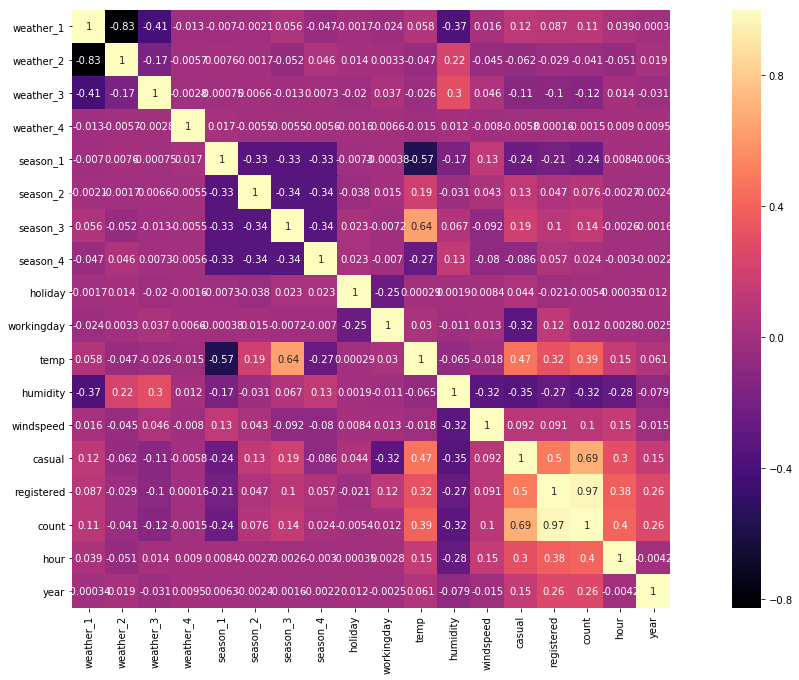

In [38]:
plt.figure(figsize = (22,11))
sns.heatmap(trX.corr(),annot = True,square = True,cmap = 'magma')

In [39]:
trX.head(2)

,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4,holiday,workingday,temp,humidity,windspeed,casual,registered,count,day,month,hour,year
0,1,0,0,0,1,0,0,0,0,0,9.84,81,0.0,3,13,16,Saturday,January,0,2011
1,1,0,0,0,1,0,0,0,0,0,9.02,80,0.0,8,32,40,Saturday,January,1,2011


In [40]:
testX.head(2)

,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4,holiday,workingday,temp,humidity,windspeed,day,month,hour,year
0,1,0,0,0,1,0,0,0,0,1,10.66,56,26.0027,Thursday,January,0,2011
1,1,0,0,0,1,0,0,0,0,1,10.66,56,0.0000,Thursday,January,1,2011


In [41]:
trX['year'] = trX['year'].map({2011:0,2012:1})
testX['year'] = testX['year'].map({2011:0,2012:1})

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


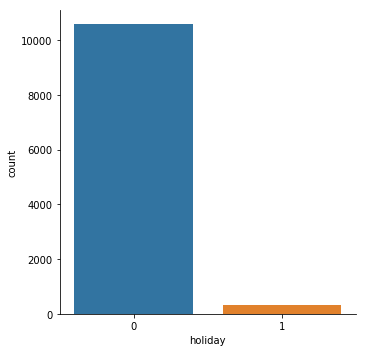

In [42]:
sns.factorplot(x = 'holiday',kind = 'count',data = trX)

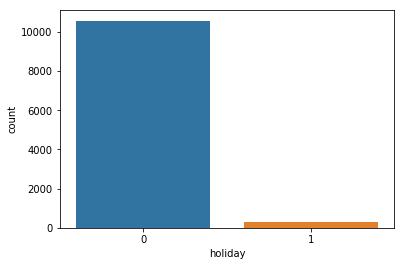

In [43]:
sns.countplot(x='holiday',data = trX)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


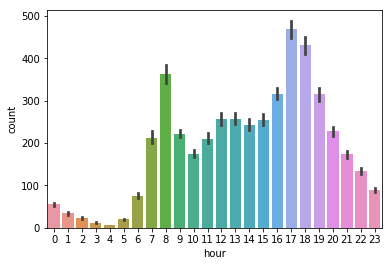

In [44]:
sns.barplot(x = 'hour',y = 'count',data = trX)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

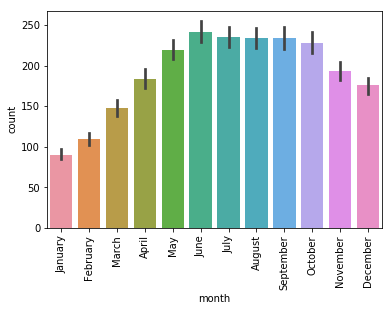

In [45]:
sns.barplot(x = 'month',y = 'count',data = trX)
plt.xticks(rotation = 90)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


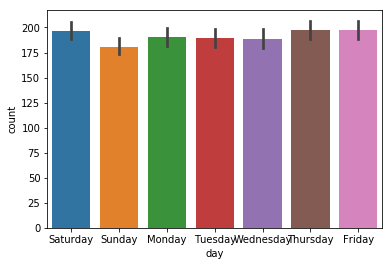

In [46]:
sns.barplot(x = 'day',y = 'count', data = trX)

In [47]:
trX['temprng'] = np.floor(trX['temp']//5)


In [48]:
testX['temprng'] = np.floor(testX['temp']//5)

In [49]:
trX.year.value_counts()

1    5464
0    5422
Name: year, dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


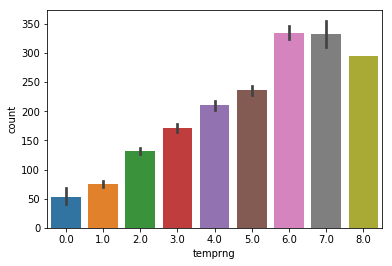

In [50]:
sns.barplot(x = 'temprng',y = 'count',data = trX)

In [51]:
y = trX['count']

In [52]:
trX['month'] = trX['month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7
                                ,'August':8, 'September':9, 'October':10,'November':11 , 'December' :12})

testX['month'] = testX['month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7
                                ,'August':8, 'September':9, 'October':10,'November':11 , 'December' :12})

In [53]:
trX['day'] = trX['day'].map({'Saturday': 1 ,'Sunday':2,'Monday':3,'Tuesday':4,'Wednesday':5,
                            'Thursday':6, 'Friday':7})
testX['day'] = testX['day'].map({'Saturday': 1 ,'Sunday':2,'Monday':3,'Tuesday':4,'Wednesday':5,
                            'Thursday':6, 'Friday':7})

In [54]:
trX = trX.drop(['casual','registered'],1)

In [55]:
Xtrain,xtest,ytrain,ytest = train_test_split(trX.drop(['count',],1),y,test_size = .25,random_state = 42)

In [56]:
Xtrain.head()

,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4,holiday,workingday,temp,humidity,windspeed,day,month,hour,year,temprng
2930,1,0,0,0,0,0,1,0,0,1,28.70,65,12.9980,3,7,0,0,5.0
7669,1,0,0,0,0,1,0,0,0,1,22.96,52,22.0028,7,5,22,1,4.0
1346,1,0,0,0,0,1,0,0,0,1,12.30,61,6.0032,7,4,23,0,2.0
9432,1,0,0,0,0,0,1,0,0,0,23.78,60,8.9981,2,9,9,1,4.0
453,0,0,1,0,1,0,0,0,0,1,8.20,93,12.9980,4,2,23,0,1.0


In [57]:
xtest.shape

(2722, 18)

In [58]:
clf = RandomForestRegressor()

In [59]:
Xtrain.head()

,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4,holiday,workingday,temp,humidity,windspeed,day,month,hour,year,temprng
2930,1,0,0,0,0,0,1,0,0,1,28.70,65,12.9980,3,7,0,0,5.0
7669,1,0,0,0,0,1,0,0,0,1,22.96,52,22.0028,7,5,22,1,4.0
1346,1,0,0,0,0,1,0,0,0,1,12.30,61,6.0032,7,4,23,0,2.0
9432,1,0,0,0,0,0,1,0,0,0,23.78,60,8.9981,2,9,9,1,4.0
453,0,0,1,0,1,0,0,0,0,1,8.20,93,12.9980,4,2,23,0,1.0


In [60]:
clf.fit(Xtrain,ytrain)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [61]:
pred=clf.predict(xtest)

In [62]:
err = (np.sqrt(mean_squared_log_error(pred,ytest)))

In [63]:
err

0.33161714485564864

In [64]:
#for random forest regresion.
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto"]}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(Xtrain,ytrain)
pred=clf_rf.predict(xtest)
print((np.sqrt(mean_squared_log_error(pred,ytest))))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while

0.31841027900547


In [65]:
testX.head()

,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4,holiday,workingday,temp,humidity,windspeed,day,month,hour,year,temprng
0,1,0,0,0,1,0,0,0,0,1,10.66,56,26.0027,6,1,0,0,2.0
1,1,0,0,0,1,0,0,0,0,1,10.66,56,0.0000,6,1,1,0,2.0
2,1,0,0,0,1,0,0,0,0,1,10.66,56,0.0000,6,1,2,0,2.0
3,1,0,0,0,1,0,0,0,0,1,10.66,56,11.0014,6,1,3,0,2.0
4,1,0,0,0,1,0,0,0,0,1,10.66,56,11.0014,6,1,4,0,2.0


In [66]:
trX.head()

,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4,holiday,workingday,temp,humidity,windspeed,count,day,month,hour,year,temprng
0,1,0,0,0,1,0,0,0,0,0,9.84,81,0.0,16,1,1,0,0,1.0
1,1,0,0,0,1,0,0,0,0,0,9.02,80,0.0,40,1,1,1,0,1.0
2,1,0,0,0,1,0,0,0,0,0,9.02,80,0.0,32,1,1,2,0,1.0
3,1,0,0,0,1,0,0,0,0,0,9.84,75,0.0,13,1,1,3,0,1.0
4,1,0,0,0,1,0,0,0,0,0,9.84,75,0.0,1,1,1,4,0,1.0


In [67]:
pred=clf_rf.predict(testX)
d={'datetime':test['datetime'],'count':pred}
ans=pd.DataFrame(d)
ans.to_csv('answer.csv',index=False) # saving to a csv file for predictions on kaggle.